# Lab 2 Sample Code

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# def sigmoid(x):
#     """Sigmoid function.
#     This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
#     """
#     return 1 / (1 + np.exp(-x))


# def der_sigmoid(y):
#     """First derivative of Sigmoid function.
#     The input to this function should be the value that output from sigmoid function.
#     """
#     return y * (1 - y)

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A, Z


def tanh(Z):
    A = np.tanh(Z)
    return A, Z


def relu(Z):
    A = np.maximum(0, Z)
    return A, Z


def leaky_relu(Z):
    A = np.maximum(0.1 * Z, Z)
    return A, Z

def sigmoid_gradient(dA, Z):
    A, Z = sigmoid(Z)
    dZ = dA * A * (1 - A)

    return dZ


def tanh_gradient(dA, Z):
    A, Z = tanh(Z)
    dZ = dA * (1 - np.square(A))

    return dZ


def relu_gradient(dA, Z):
    A, Z = relu(Z)
    dZ = np.multiply(dA, np.int64(A > 0))

    return dZ


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=100):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)


class SimpleNet:
    def __init__(self, num_step=6000, print_interval=100, learning_rate=1e-2):  # don't change print_interval
        """A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate

        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 50 nodes
        # hidden layer 3: 10 nodes
        # Please initiate your network parameters here.
        self.hidden1_weights = ...
        ...

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"{data.shape}, {gt_y.shape}, {pred_y.shape}"

        plt.figure(figsize=(11, 5))

        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)

        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)

        plt.show()

    def initialize_parameters(self, layers_dims):
        np.random.seed(1)               
        parameters = {}
        L = len(layers_dims)            

        for l in range(1, L):           
            parameters["W" + str(l)] = np.random.randn(
                layers_dims[l], layers_dims[l - 1]) * 0.01
            parameters["b" + str(l)] = np.random.randn(
                layers_dims[l], 1) * 0.1

            assert parameters["W" + str(l)].shape == (
                layers_dims[l], layers_dims[l - 1])
            assert parameters["b" + str(l)].shape == (layers_dims[l], 1)
        
        return parameters

    def forward(self, inputs):
        """Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """
        """ FILL IN HERE """
        return ...

    def backward(self):
        """Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        """ FILL IN HERE """
        ...

    # Define helper functions that will be used in L-model forward prop
    def linear_forward(self, A_prev, W, b):
        Z = np.dot(W, A_prev) + b
        cache = (A_prev, W, b)
        return Z, cache


    def linear_activation_forward(self, A_prev, W, b, activation_fn):
        assert activation_fn == "sigmoid" or activation_fn == "tanh" or \
            activation_fn == "relu"

        if activation_fn == "sigmoid":
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = sigmoid(Z)

        elif activation_fn == "tanh":
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = tanh(Z)

        elif activation_fn == "relu":
            Z, linear_cache = self.linear_forward(A_prev, W, b)
            A, activation_cache = relu(Z)

        assert A.shape == (W.shape[0], A_prev.shape[1])

        cache = (linear_cache, activation_cache)
        return A, cache


    def L_model_forward(self, X, parameters, hidden_layers_activation_fn="relu"):
        A = X                           
        caches = []                     
        L = len(parameters) // 2        

        for l in range(1, L):
            A_prev = A
            A, cache = self.linear_activation_forward(
                A_prev, parameters["W" + str(l)], parameters["b" + str(l)],
                activation_fn=hidden_layers_activation_fn)
            caches.append(cache)

        AL, cache = self.linear_activation_forward(
            A, parameters["W" + str(L)], parameters["b" + str(L)],
            activation_fn="sigmoid")
        caches.append(cache)

        assert AL.shape == (1, X.shape[1])
        return AL, caches

    # define helper functions that will be used in L-model back-prop
    def linear_backword(self, dZ, cache):
        A_prev, W, b = cache
        m = A_prev.shape[1]

        dW = (1 / m) * np.dot(dZ, A_prev.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(W.T, dZ)

        assert dA_prev.shape == A_prev.shape
        assert dW.shape == W.shape
        assert db.shape == b.shape

        return dA_prev, dW, db


    def linear_activation_backward(self, dA, cache, activation_fn):
        linear_cache, activation_cache = cache

        if activation_fn == "sigmoid":
            dZ = sigmoid_gradient(dA, activation_cache)
            dA_prev, dW, db = self.linear_backword(dZ, linear_cache)

        elif activation_fn == "tanh":
            dZ = tanh_gradient(dA, activation_cache)
            dA_prev, dW, db = self.linear_backword(dZ, linear_cache)

        elif activation_fn == "relu":
            dZ = relu_gradient(dA, activation_cache)
            dA_prev, dW, db = self.linear_backword(dZ, linear_cache)

        return dA_prev, dW, db


    def L_model_backward(self, AL, y, caches, hidden_layers_activation_fn="relu"):
        y = y.reshape(AL.shape)
        L = len(caches)
        grads = {}

        dAL = np.divide(AL - y, np.multiply(AL, 1 - AL))

        grads["dA" + str(L - 1)], grads["dW" + str(L)], grads[
            "db" + str(L)] = self.linear_activation_backward(
                dAL, caches[L - 1], "sigmoid")

        for l in range(L - 1, 0, -1):
            current_cache = caches[l - 1]
            grads["dA" + str(l - 1)], grads["dW" + str(l)], grads[
                "db" + str(l)] = self.linear_activation_backward(
                    grads["dA" + str(l)], current_cache,
                    hidden_layers_activation_fn)

        return grads

    # Compute cross-entropy cost
    def compute_cost(self, AL, y):
        m = y.shape[1]              
        cost = - (1 / m) * np.sum(
            np.multiply(y, np.log(AL)) + np.multiply(1 - y, np.log(1 - AL)))
        return cost

    def update_parameters(self, parameters, grads, learning_rate):
        L = len(parameters) // 2

        for l in range(1, L + 1):
            parameters["W" + str(l)] = parameters[
                "W" + str(l)] - learning_rate * grads["dW" + str(l)]
            parameters["b" + str(l)] = parameters[
                "b" + str(l)] - learning_rate * grads["db" + str(l)]
        return parameters

    # Define the multi-layer model using all the helper functions we wrote before
    def L_layer_model(
        self, X, y, layers_dims, learning_rate=0.01, num_iterations=3000,
        print_cost=True, hidden_layers_activation_fn="relu"):
        np.random.seed(1)

        # initialize parameters
        parameters = self.initialize_parameters(layers_dims)

        # intialize cost list
        cost_list = []

        # iterate over num_iterations
        for i in range(num_iterations):
            # iterate over L-layers to get the final output and the cache
            AL, caches = self.L_model_forward(
                X, parameters, hidden_layers_activation_fn)

            # compute cost to plot it
            cost = self.compute_cost(AL, y)

            # iterate over L-layers backward to get gradients
            grads = self.L_model_backward(AL, y, caches, hidden_layers_activation_fn)

            # update parameters
            parameters = self.update_parameters(parameters, grads, learning_rate)

            # append each 100th cost to the cost list
            if (i + 1) % 100 == 0 and print_cost:
                print(f"The cost after {i + 1} iterations is: {cost:.4f}")

            if i % 100 == 0:
                cost_list.append(cost)
        
        # plot the cost curve
        plt.figure(figsize=(10, 6))
        plt.plot(cost_list)
        plt.xlabel("Iterations (per hundreds)")
        plt.ylabel("Loss")
        plt.title(f"Loss curve for the learning rate = {learning_rate}")

        return parameters

        

    def accuracy(self, X, parameters, y, activation_fn="relu"):
        probs, caches = self.L_model_forward(X, parameters, activation_fn)
        labels = (probs >= 0.5) * 1
        accuracy = np.mean(labels == y) * 100
        return f"The accuracy rate is: {accuracy:.2f}%."

    def train(self, inputs, labels):
        """The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                self.output = self.forward(inputs[idx : idx + 1, :])
                self.error = self.output - labels[idx : idx + 1, :]
                self.backward()

            if epochs % self.print_interval == 0:
                print("Epochs {}: ".format(epochs), end="")
                self.test(inputs, labels)

        print("Training finished")
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            error += abs(result - labels[idx : idx + 1, :])

        error /= n

        """ Print or plot your results in your preferred forms"""
        print("accuracy: %.2f" % ((1 - error) * 100) + "%")

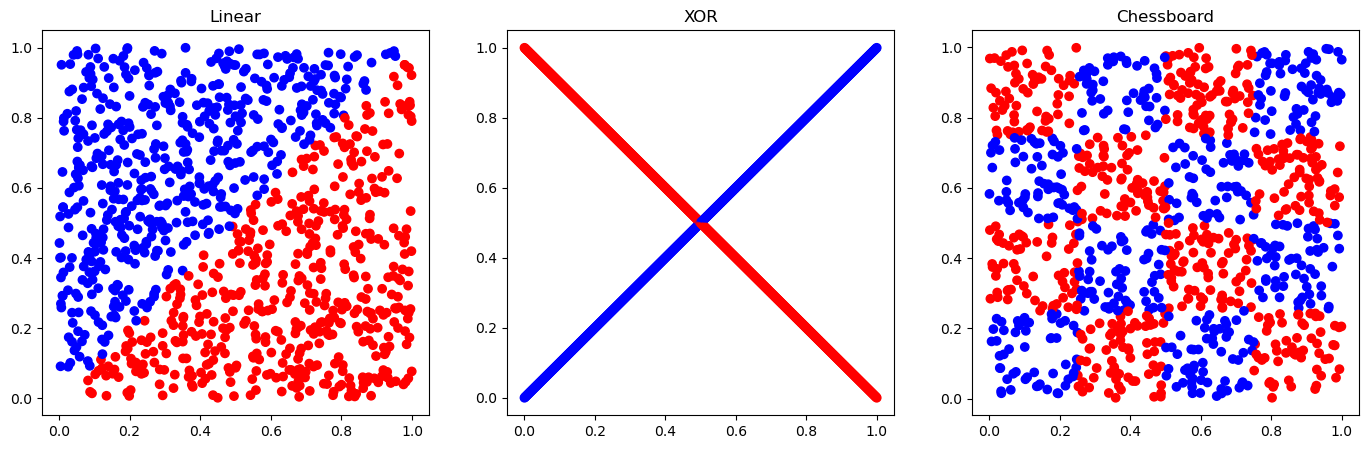

In [20]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

### Run "Linear"

Original dimensions:
--------------------
Training: (500, 2), (500, 1)

New dimensions:
---------------
Training: (2, 500), (1, 500)
The cost after 100 iterations is: 0.6932
The cost after 200 iterations is: 0.6931
The cost after 300 iterations is: 0.6931
The cost after 400 iterations is: 0.6931
The cost after 500 iterations is: 0.6931
The cost after 600 iterations is: 0.6931
The cost after 700 iterations is: 0.6931
The cost after 800 iterations is: 0.6931
The cost after 900 iterations is: 0.6931
The cost after 1000 iterations is: 0.6931
The cost after 1100 iterations is: 0.6931
The cost after 1200 iterations is: 0.6931
The cost after 1300 iterations is: 0.6930
The cost after 1400 iterations is: 0.6930
The cost after 1500 iterations is: 0.6930
The cost after 1600 iterations is: 0.6930
The cost after 1700 iterations is: 0.6930
The cost after 1800 iterations is: 0.6930
The cost after 1900 iterations is: 0.6929
The cost after 2000 iterations is: 0.6929
The cost after 2100 iterations is: 0

'The accuracy rate is: 50.40%.'

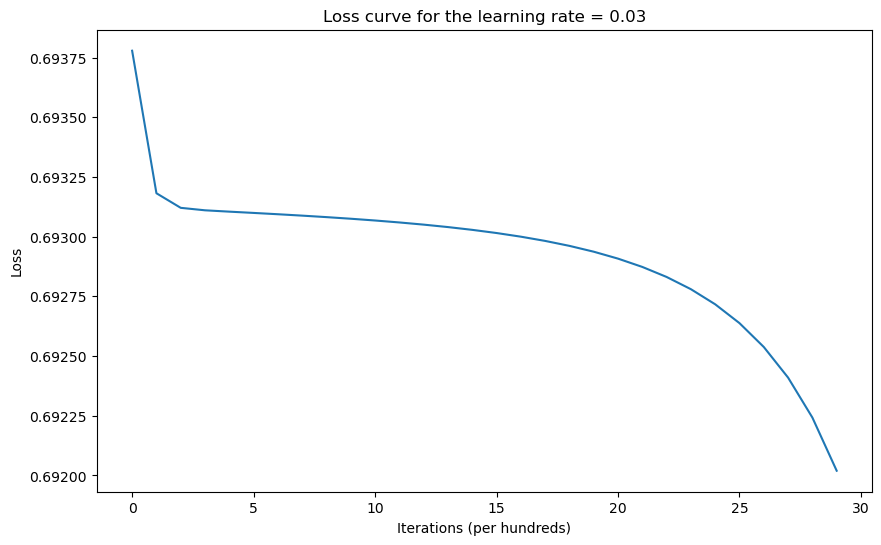

In [21]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Linear", 500)
# print(label[0 : 0 + 1, :].reshape(-1).shape)

data, label = GenData.fetch_data("Linear", 500)
print(f"Original dimensions:\n{20 * '-'}\nTraining: {data.shape}, {label.shape}")

data = data.T
label = label.reshape(-1, 500)
print(f"\nNew dimensions:\n{15 * '-'}\nTraining: {data.shape}, {label.shape}")

net = SimpleNet(2000)

# Setting layers dims
layers_dims = [data.shape[0], 100, 50, 1]
# NN with tanh activation fn
parameters_tanh = net.L_layer_model(data, label, layers_dims, learning_rate=0.03, num_iterations=3000, hidden_layers_activation_fn="tanh")
# Print the accuracy
net.accuracy(data, parameters_tanh, label, activation_fn="tanh")

# net = SimpleNet(2000)
# net.train(data, label)

# pred_result = np.round(net.forward(data))
# SimpleNet.plot_result(data, label, pred_result)

### Run "XOR"

In [22]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)

net = SimpleNet(2000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

TypeError: unsupported operand type(s) for -: 'ellipsis' and 'int'

### Run "Chessboard"

In [ ]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)

net = SimpleNet(2000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

ValueError: shapes (2,2) and (1,10) not aligned: 2 (dim 1) != 1 (dim 0)